In [2]:
# mongodb를 사용하기 위한 라이브러리
! pip install pymongo

In [1]:
import pymongo

username = "id124"
password = "pw124"
host = "1.234.5.158"
port = 37017
dbname = "id124"

# mongodb 접속
# conn = pymongo.MongoClient(f"mongodb://{host}:{port}") 
conn= pymongo.MongoClient(f'mongodb://{username}:{password}@{host}:{port}/{dbname}')

db = conn.get_database(dbname) #db선택

collection = db.get_collection("member") #collection == table과 비슷함
dic1 = {"id":"pyid", "pw":"aaa","name":'abc', "age":33} #딕셔너리 타입으로 생성
collection.insert_one(dic1) # mongodb에 추가

conn.close()    


In [8]:
import pymongo
import pandas as pd

try:
    username = "id124"
    password = "pw124"
    host = "1.234.5.158"
    port = 37017
    dbname = "id124"
    
    # mongodb접속
    conn = pymongo.MongoClient(f'mongodb://{username}:{password}@{host}:{port}/{dbname}')
    db = conn.get_database(dbname)
    collection = db.get_collection("ex1_20210520") 
    
    data = collection.find({}, {'_id':0}) # _id는 제외하고 가져와라.
    df = pd.DataFrame(data)
    
except Exception as e:
    print(e)
finally:
    conn.close()

df.head() # 앞쪽에서 5개만 출력
df.tail() # 뒤쪽에서 5개만 출력
        

,id,name,age
7,aaa,다라마,42
8,aaa,가나다,12
9,aaa,가다라,22
10,aaa,다라마,32
11,aaa,다라마,42


In [12]:
import pandas as pd

# 수집한 데이터 [ {}, {}, {} ] => mongodb, hadoop
data = [{"key" : "aaa", "value" : 1}, {"key" : "bbb", "value" : 2}, {"key" : "ccc", "value" : 3}]

# 데이터 전처리 => 작업했음
df = pd.DataFrame(data)
df

# dataframe을 dictionary로 변환
data1 = df.to_dict(orient = 'records')
data1

[{'key': 'aaa', 'value': 1},
 {'key': 'bbb', 'value': 2},
 {'key': 'ccc', 'value': 3}]

In [38]:
import pymongo
import pandas as pd

try:
    username = "id124"
    password = "pw124"
    host = "1.234.5.158"
    port = 37017
    dbname = "id124"
    
    # mongodb접속
    conn = pymongo.MongoClient(f'mongodb://{username}:{password}@{host}:{port}/{dbname}')
    db = conn.get_database(dbname)
    collection = db.get_collection("ex1_20210526") 
    
    collection.insert_many(data1)
    
except Exception as e:
    print(e)
finally:
    conn.close()

name 'data1' is not defined


In [39]:

from selenium import webdriver  # pip install selenium
import bs4 # pip install bs4
import time
import urllib.request as REQ  #서버 요청

url = "https://shoppinghow.kakao.com/top"

# 옵션설정
options = webdriver.ChromeOptions()
options.add_argument("disable-gpu")   
options.add_argument("lang=ko_KR")  
# options.add_argument("headless")  # 크롬창이 표시되지 않음
options.add_argument('user-agent=Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/61.0.3163.100 Safari/537.36')  # user-agent 

# 드라이브 로딩
driver = webdriver.Chrome(executable_path="driver/chromedriver.exe", options=options)

# 페이지 접속
driver.get(url)

# 로딩되는 시간이 있으므로 1초 기다림
time.sleep(1)

data4 = []
for i in range(1,4,1):
    img = driver.find_element_by_xpath(f'//*[@id="topRecomKeywordWrap"]/div[2]/ul/li[{i}]/a/img')
    data4.append(img.get_attribute("src"))
    
#     REQ.urlretrieve(img.get_attribute("src"), f'download/abc_{i}.jpg')
    
print(data4)
driver.close()

['https://shop2.daumcdn.net/thumb/R250x250/?fname=https%3A%2F%2Fshop2.daumcdn.net%2Fshophow%2Fp%2FK13027911753.jpg%3Fut%3D20210423163707', 'https://shop1.daumcdn.net/thumb/R250x250/?fname=https%3A%2F%2Fshop1.daumcdn.net%2Fshophow%2Fp%2FA5093002126.jpg%3Fut%3D20210503050522', 'https://shop1.daumcdn.net/thumb/R250x250/?fname=https%3A%2F%2Fshop1.daumcdn.net%2Fshophow%2Fp%2FA4640578494.jpg%3Fut%3D20180403145101']


In [40]:
# 이미지 링크를 이용하여 byte로 받기
import requests
import io
import bson
import time

data5 = [] # mongodb에 추가하기 위한 [{}, {}, {}] 로 저장하기 위한 변수
for idx, tmp in enumerate(data4):
    response = requests.get(tmp) # src 주소를 호출해서 값을 받아옴
    byte1 = io.BytesIO(response.content) # 받아온 값을 bytes로 변경
    data5.append({ "name" : "이미지 저장", "binary_data" : bson.Binary(byte1.read()) })
    
    print(idx, tmp)

0 https://shop2.daumcdn.net/thumb/R250x250/?fname=https%3A%2F%2Fshop2.daumcdn.net%2Fshophow%2Fp%2FK13027911753.jpg%3Fut%3D20210423163707
1 https://shop1.daumcdn.net/thumb/R250x250/?fname=https%3A%2F%2Fshop1.daumcdn.net%2Fshophow%2Fp%2FA5093002126.jpg%3Fut%3D20210503050522
2 https://shop1.daumcdn.net/thumb/R250x250/?fname=https%3A%2F%2Fshop1.daumcdn.net%2Fshophow%2Fp%2FA4640578494.jpg%3Fut%3D20180403145101


In [47]:
import pymongo
import pandas as pd

try:
    username = "id124"
    password = "pw124"
    host = "1.234.5.158"
    port = 37017
    dbname = "id124"
    
    # mongodb접속
    conn = pymongo.MongoClient(f'mongodb://{username}:{password}@{host}:{port}/{dbname}')
    db = conn.get_database(dbname)
    collection = db.get_collection("image1_20210526") 
    
    data6 = collection.find({}, {'_id':0})
    
except Exception as e:
    print(e)
finally:
    conn.close()



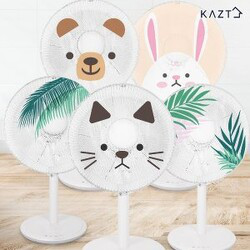

In [48]:
from PIL import Image
import io


#가져온 데이터 이미지로 출력하기
img1 = data6[0]['binary_data']

output = Image.open(io.BytesIO(img1)) #bytes를 _io.bytes 타입으로 변환
output

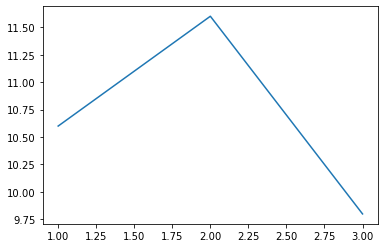

In [15]:
import matplotlib.pyplot as plt

x = [1,2,3]
y = [10.6, 11.6, 9.8]

plt.plot(x,y)
plt.show()

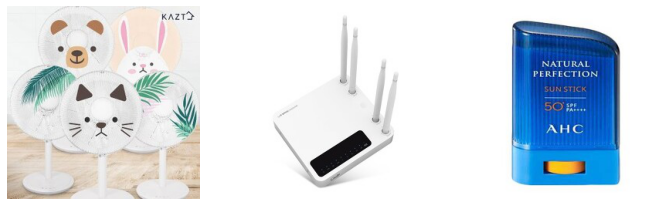

In [53]:
from PIL import Image
import matplotlib.pyplot as plt
import io

data6 = collection.find({}, {'_id':0})

plt.rcParams['figure.figsize'] = (20,5)

#가져온 데이터 이미지로 출력하기  [  {},  {},  {}]
for idx, tmp in enumerate(data6):
    plt.subplot(1,5,idx+1)
    plt.axis('off')
    plt.imshow( Image.open(io.BytesIO( tmp['binary_data'] )) )
plt.show() 


In [6]:
import pymongo
import pandas as pd

try:
    host = "127.0.0.1"
    dbname = "db"
    port = 27017
    
    # mongodb접속
    conn = pymongo.MongoClient(f'mongodb://{host}:{port}')
    db = conn.get_database(dbname)
    collection = db.get_collection("ex_20210526") 
    
    # 수집한 데이터 [ {}, {}, {} ] => mongodb, hadoop
    data = [{"key" : "aaa", "value" : 1}, {"key" : "bbb", "value" : 2}, {"key" : "ccc", "value" : 3}]
    collection.insert_many(data)
    
except Exception as e:
    print(e)
finally:
    conn.close()
    